In [126]:
import pandas as pd
import numpy as np

### Reading the dataset

In [127]:
list_of_lists = []

with open('input/input03.txt') as f:
    for line in f:
        inner_list = [elt.strip() for elt in line.split(' ')]
        list_of_lists.append(inner_list)

In [186]:
list_of_lists[:5]

[['2', '100'],
 ['0.44', '0.68', '511.14'],
 ['0.99', '0.23', '717.1'],
 ['0.84', '0.29', '607.91'],
 ['0.28', '0.45', '270.4']]

In [168]:
# training data
n_rows_training = int(list_of_lists[0][1])
training = np.array(list_of_lists[1:n_rows_training+1]).astype(float)
# testing data
n_rows_testing = int(list_of_lists[n_rows_training+1][0])
X_tes = np.array(list_of_lists[n_rows_training+2:]).astype(float)

In [129]:
# creat the training and dev X
X_training = training[:80,:2]
X_dev = training[80:,:2]

In [130]:
# create the training and dev Y

In [131]:
y_training = training[:80,2]
y_dev = training[80:,2]

### Plotting 

In [132]:
from matplotlib import pyplot as plt

- let's see if the features are correlated


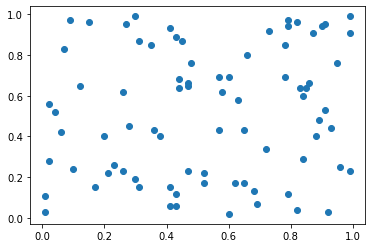

In [133]:
plt.plot(X_training[:, 0], X_training[:, 1], 'o');

> Good news, there is not correlations between features, that means both of them add information

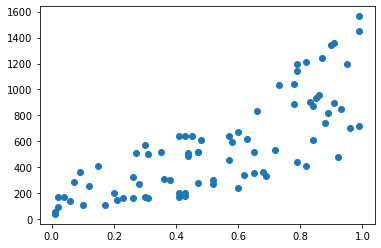

In [134]:
# now we can plot each one of the covariates with the response variable 
plt.plot(X_training[:, 0], y_training, 'o');

> Some postive and strong correlation

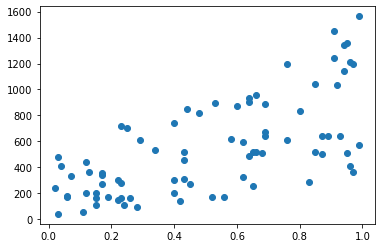

In [135]:
plt.plot(X_training[:, 1], y_training, 'o');

> Again postive and strong correlation

### Modeling

1- Will start with ridge regression

In [136]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_training, y_training)
ridge.score(X_training, y_training)

0.9265972636707327

- Well this is not bad. But let's see the prediction vs the ture values

In [139]:
y_predicted = ridge.predict(X_training)

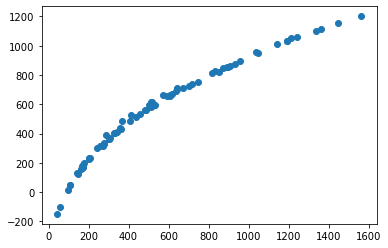

In [141]:
plt.plot(y_training,y_predicted, 'o');

> Not very impressive, we were aiming at straight line.

In [143]:
sum(abs(y_predicted-y_training)/y_training)

19.044924766088016

### Improving the model

In [147]:
# creating a poly fearures
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
# fitting trainsform the X -train
x_poly = polynomial_features.fit_transform(X_training)

ridge_p = Ridge(alpha=1.0)
ridge_p.fit(x_poly, y_training)
ridge_p.score(x_poly, y_training)

0.9897681743007263

> That's indeed very impressive. We improved the R2 tremendously, let's visualize the output

In [153]:
y_predcited_p = ridge_p.predict(x_poly)

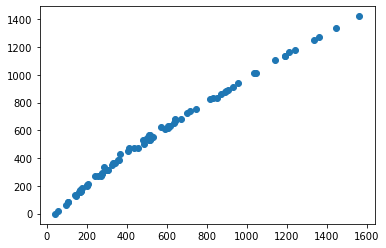

In [154]:
plt.plot(y_training,y_predicted_p, 'o');

> This line sounds more like a straight line.

### Testing the result on develpment set

In [159]:
polynomial_features_dev= PolynomialFeatures(degree=2)
# fitting trainsform the X -train
X_poly_dev = polynomial_features.fit_transform(X_dev)
ridge_dev = Ridge(alpha=1.0)
ridge_dev.fit(x_poly_dev, y_dev)
ridge_dev.score(X_poly_dev, y_dev)

0.9113014388424835

In [161]:
y_predcited_dev = ridge_p.predict(X_poly_dev)

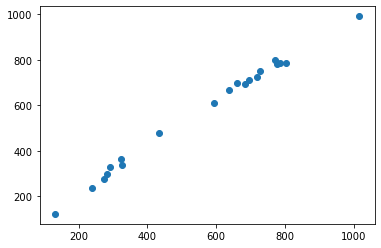

In [163]:
plt.plot(y_dev,y_predcited_dev, 'o');

### Testing the result on test set

- First we will fit out best model on the whole data set

In [172]:
polynomial_features_test= PolynomialFeatures(degree=2)
# fitting trainsform the X -train
X_poly_training_full = polynomial_features.fit_transform(training[:,:2])
ridge_test = Ridge(alpha=1.0)
ridge_test.fit(X_poly_training_full, training[:,2])
ridge_test.score(X_poly_training_full, training[:,2])

0.9905852611613077

> We got a very hight R2 on when we have a bigget dataset. let's test it on the test set

- to test our model on the test data, first we transform the test data "we don't fit , we only transform"

In [178]:
X_poly_test = polynomial_features.transform(testing)

- Now we are ready to get our prediciton.

In [188]:
y_test_predicted = ridge_test.predict(X_poly_test)
y_test_predicted

array([ 173.98668323, 1231.28506572,  467.64156915,  355.09819721])

### Other things that we could have done to improve the model

- Using RidgeCV

In [190]:
from sklearn.linear_model import RidgeCV

polynomial_features_test= PolynomialFeatures(degree=2)
# fitting trainsform the X -train
X_poly_training_full = polynomial_features.fit_transform(training[:,:2])
ridge_test = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 5, 7])
ridge_test.fit(X_poly_training_full, training[:,2])
ridge_test.score(X_poly_training_full, training[:,2])

0.9993662479634483

> Our model was already strong, the improvement was only minor